In [1]:
import requests
from bs4 import BeautifulSoup

# Open the text file and read the content into a list
with open('obama_url.txt', 'r', encoding='utf-8') as file:
    urls = file.readlines()

# Strip any leading/trailing whitespace and newlines from each line
urls = [line.strip() for line in urls]

for url in urls:
    print(url)
    # URL of the page to scrape
    # Send a GET request to the website
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the speech text inside <div> elements with class 'transcript-inner'
        span_texts = soup.find_all('div', class_='transcript-inner')

        # Extract and concatenate the text from each div
        full_text = ' '.join(span.text.strip() for span in span_texts)
        full_text = full_text[10:]  # Adjust the text as required (e.g., remove initial characters)

        # Write the entire speech text as it is, without splitting or modifying punctuation
        with open('obama.txt', 'a', encoding='utf-8') as file:
            file.write(full_text.strip() + '\n')  # Write the entire speech followed by a newline

        print(f"Scraped and saved the speech to obama.txt.")
    else:
        print("Failed to retrieve the webpage.")


https://millercenter.org/the-presidency/presidential-speeches/january-10-2017-farewell-address-nation
Scraped and saved the speech to obama.txt.
https://millercenter.org/the-presidency/presidential-speeches/march-22-2016-remarks-people-cuba
Scraped and saved the speech to obama.txt.
https://millercenter.org/the-presidency/presidential-speeches/january-12-2016-2016-state-union-address
Scraped and saved the speech to obama.txt.
https://millercenter.org/the-presidency/presidential-speeches/june-26-2015-remarks-eulogy-honorable-reverend-clementa
Scraped and saved the speech to obama.txt.
https://millercenter.org/the-presidency/presidential-speeches/march-7-2015-remarks-50th-anniversary-selma-marches
Scraped and saved the speech to obama.txt.
https://millercenter.org/the-presidency/presidential-speeches/january-20-2015-2015-state-union-address
Scraped and saved the speech to obama.txt.
https://millercenter.org/the-presidency/presidential-speeches/november-20-2014-address-nation-immigration


In [2]:
import requests
from bs4 import BeautifulSoup

# Open the text file and read the content into a list
with open('Trump_url.txt', 'r', encoding='utf-8') as file:
    urls = file.readlines()

# Strip any leading/trailing whitespace and newlines from each line
urls = [line.strip() for line in urls]

for url in urls:
    print(url)
    # URL of the page to scrape
    # Send a GET request to the website
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the HTML content of the page
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the speech text inside <div> elements with class 'transcript-inner'
        span_texts = soup.find_all('div', class_='transcript-inner')

        # Extract and concatenate the text from each div
        full_text = ' '.join(span.text.strip() for span in span_texts)
        full_text = full_text[10:]  # Adjust the text as required (e.g., remove initial characters)

        # Write the entire speech text as it is, without splitting or modifying punctuation
        with open('trump.txt', 'a', encoding='utf-8') as file:
            file.write(full_text.strip() + '\n')  # Write the entire speech followed by a newline

        print(f"Scraped and saved the speech to trump.txt.")
    else:
        print("Failed to retrieve the webpage.")


https://millercenter.org/the-presidency/presidential-speeches/january-19-2021-farewell-address
Scraped and saved the speech to trump.txt.
https://millercenter.org/the-presidency/presidential-speeches/january-13-2021-statement-about-violence-capitol
Scraped and saved the speech to trump.txt.
https://millercenter.org/the-presidency/presidential-speeches/january-7-2021-message-after-pro-trump-mob-overruns-us-capitol
Scraped and saved the speech to trump.txt.
https://millercenter.org/the-presidency/presidential-speeches/january-6-2021-speech-urging-supporters-go-home
Scraped and saved the speech to trump.txt.
https://millercenter.org/the-presidency/presidential-speeches/november-5-2020-remarks-2020-election
Scraped and saved the speech to trump.txt.
https://millercenter.org/the-presidency/presidential-speeches/october-26-2020-swearing-ceremony-honorable-amy-coney-barrett
Scraped and saved the speech to trump.txt.
https://millercenter.org/the-presidency/presidential-speeches/september-26-20

In [1]:
import os
import torch.backends.cudnn
torch.backends.cudnn.enabled = False

# Define the path to your local folder (same directory as script)
folder_path = os.getcwd()  # Current working directory

# List of file names to read
file_names = ['trump.txt', 'obama.txt']

# Dictionary to store contents
contents = {}

# Loop through each file and read its content
for file_name in file_names:
    # Create full file path
    file_path = os.path.join(folder_path, file_name)
    
    # Check if the file exists
    if os.path.exists(file_path):
        with open(file_path, 'r', encoding='utf-8') as file:  # Use utf-8 encoding
            content = file.read()
            #print(f"Content of {file_name}:\n{content}\n{'='*20}")
            # Store content in dictionary
            contents[file_name] = content
    else:
        print(f"File '{file_name}' not found in the specified directory.")

# Optional: Print summary of loaded files
print("\nLoaded files:")
for key in contents.keys():
    print(f"- {key}")



Loaded files:
- trump.txt
- obama.txt


In [2]:
# prompt: get how many word exist in each filename, only use contents dictionary

for file_name, content in contents.items():
  word_count = len(content.split())
  print(f"Number of words in {file_name}: {word_count}")

Number of words in trump.txt: 424317
Number of words in obama.txt: 357941


In [3]:
import re

def preprocess_trump_text_debug(text):
    print(f"Original word count: {len(text.split())}")

    # 1. Remove "Q:" and "President:" markers
    text = re.sub(r'(Q:|President:)', '', text)
    print(f"After removing markers: {len(text.split())}")

    # 2. Remove stage directions (e.g., "(Applause)")
    text = re.sub(r'\(.*?\)', '', text)
    print(f"After removing stage directions: {len(text.split())}")

    # 3. Standardize line breaks
    text = re.sub(r'(?<!\n)\n(?!\n)', ' ', text)  # Replace single newlines with space
    print(f"After standardizing single line breaks: {len(text.split())}")
    text = re.sub(r'\n{2,}', '\n', text)          # Retain paragraph breaks
    print(f"After standardizing paragraph breaks: {len(text.split())}")

    # 4. Remove redundant repetitions
    text = re.sub(r'\b(\w+)(?: \1\b)+', r'\1', text)
    print(f"After removing redundant repetitions: {len(text.split())}")

    # 5. Normalize whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    print(f"After normalizing whitespace: {len(text.split())}")

    return text

def preprocess_obama_text_debug(text):
    """
    Preprocesses text data by cleaning markers, removing stage directions,
    standardizing line breaks, and normalizing repetitions, with debugging outputs.

    Parameters:
        text (str): Input raw text.

    Returns:
        str: Cleaned and preprocessed text.
    """
    # Original word count
    print(f"Original word count: {len(text.split())}")

    # 1. Remove audience reactions (e.g., "(Applause)", "(Laughter)")
    text = re.sub(r'\(.*?\)', '', text)
    print(f"After removing audience reactions: {len(text.split())}")

    # 2. Remove speaker labels (e.g., "THE PRESIDENT:", "AUDIENCE:")
    text = re.sub(r'^(THE PRESIDENT:|AUDIENCE:)', '', text, flags=re.MULTILINE)
    print(f"After removing speaker labels: {len(text.split())}")

    # 3. Standardize line breaks
    text = re.sub(r'(?<!\n)\n(?!\n)', ' ', text)  # Replace single newlines with space
    print(f"After replacing single line breaks: {len(text.split())}")
    text = re.sub(r'\n{2,}', '\n', text)          # Retain paragraph breaks
    print(f"After retaining paragraph breaks: {len(text.split())}")

    # 4. Remove redundant repetitions (e.g., "Thank you. Thank you." → "Thank you.")
    text = re.sub(r'\b(\w+)(?: \1\b)+', r'\1', text)
    print(f"After removing redundant repetitions: {len(text.split())}")

    # 5. Normalize whitespace (e.g., excessive spaces)
    text = re.sub(r'\s+', ' ', text).strip()
    print(f"After normalizing whitespace: {len(text.split())}")

    return text

In [4]:
print("Trump: ")
proccessed_trump = preprocess_trump_text_debug(contents['trump.txt'])
print("Obama: ")
proccessed_obama = preprocess_obama_text_debug(contents['obama.txt'])


Trump: 
Original word count: 424317
After removing markers: 423393
After removing stage directions: 421604
After standardizing single line breaks: 421604
After standardizing paragraph breaks: 421604
After removing redundant repetitions: 421560
After normalizing whitespace: 421560
Obama: 
Original word count: 357941
After removing audience reactions: 355553
After removing speaker labels: 355251
After replacing single line breaks: 355251
After retaining paragraph breaks: 355251
After removing redundant repetitions: 355225
After normalizing whitespace: 355225


In [89]:
def split_sentences(text):
    # Step 1: Handle abbreviations and decimal numbers
    # Replace dots in common abbreviations and numbers with markers
    abbreviations = r'\b(Mr|Mrs|Dr|U\.S|U\.S\.A|etc|e\.g|i\.e|vs)\.'
    text = re.sub(abbreviations, lambda m: m.group(0).replace('.', '<DOT>'), text)
    text = re.sub(r'(\d+)\.(\d+)', r'\1<DOT>\2', text)  # Handle decimals like 3.5

    # Step 2: Use a regex pattern to split by sentence-ending punctuation
    pattern = r'(?<=[.!?])\s+(?=[A-Z])'  # Split at ". ", "! ", "? " followed by a capital letter
    sentences = re.split(pattern, text)

    # Step 3: Add line breaks as sentence boundaries
    lines = text.splitlines()  # Split by lines
    all_sentences = []
    for line in lines:
        line_sentences = re.split(pattern, line)  # Split each line into sentences
        all_sentences.extend(line_sentences)

    # Step 4: Replace markers back to original form
    all_sentences = [re.sub(r'<DOT>', '.', sentence).strip() for sentence in all_sentences]

    # Step 5: Filter out empty strings
    all_sentences = [sentence for sentence in all_sentences if sentence]

    return all_sentences


trump_speeches = split_sentences(proccessed_trump)
obama_speeches = split_sentences(proccessed_obama)

trump_train = trump_speeches[:len(trump_speeches)//80]
obama_train = obama_speeches[:len(obama_speeches)//40]

trump_test = trump_speeches[len(trump_speeches)//80:]
obama_test = obama_speeches[len(obama_speeches)//40:]

In [90]:
import numpy as np


print(len(trump_train))
print(len(obama_train))

# Sample data for trump_train (2D list)
# trump_train = trump_speeches[:len(trump_speeches)//10]  # Assuming this is already defined
print("Trump: ")
# Step 1: Calculate the lengths of each sublist
lengths = [len(sublist) for sublist in trump_train]

# Step 2: Calculate statistics
min_value = np.min(lengths)
q1 = np.percentile(lengths, 25)
median = np.median(lengths)  # Q2
q3 = np.percentile(lengths, 75)
max_value = np.max(lengths)

# Step 3: Print the results
print("Minimum length:", min_value)
print("Q1 (25th percentile):", q1)
print("Median (Q2):", median)
print("Q3 (75th percentile):", q3)
print("Maximum length:", max_value)


print("Obama: ")


# Step 1: Calculate the lengths of each sublist
lengths = [len(sublist) for sublist in obama_train]

# Step 2: Calculate statistics
min_value = np.min(lengths)
q1 = np.percentile(lengths, 25)
median = np.median(lengths)  # Q2
q3 = np.percentile(lengths, 75)
max_value = np.max(lengths)

# Step 3: Print the results
print("Minimum length:", min_value)
print("Q1 (25th percentile):", q1)
print("Median (Q2):", median)
print("Q3 (75th percentile):", q3)
print("Maximum length:", max_value)



401
455
Trump: 
Minimum length: 5
Q1 (25th percentile): 44.0
Median (Q2): 81.0
Q3 (75th percentile): 117.0
Maximum length: 325
Obama: 
Minimum length: 7
Q1 (25th percentile): 49.0
Median (Q2): 90.0
Q3 (75th percentile): 140.5
Maximum length: 1094


In [91]:
from transformers import GPT2Tokenizer
import torch
from torch.utils.data import DataLoader, TensorDataset

# Load tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token  # Set PAD token to EOS for GPT2 compatibility

# Prepare data
def prepare_data(sentences, style_label, tokenizer, max_len=40):
    inputs = tokenizer(sentences, padding="max_length", truncation=True, max_length=max_len, return_tensors="pt")
    labels = torch.tensor([style_label] * len(sentences))
    return inputs['input_ids'], inputs['attention_mask'], labels

# Prepare train and test sets
trump_train_ids, trump_train_mask, trump_train_labels = prepare_data(trump_train, style_label=1, tokenizer=tokenizer)
obama_train_ids, obama_train_mask, obama_train_labels = prepare_data(obama_train, style_label=0, tokenizer=tokenizer)

trump_test_ids, trump_test_mask, trump_test_labels = prepare_data(trump_test, style_label=1, tokenizer=tokenizer)
obama_test_ids, obama_test_mask, obama_test_labels = prepare_data(obama_test, style_label=0, tokenizer=tokenizer)

# Combine datasets
train_input_ids = torch.cat([trump_train_ids, obama_train_ids])
train_attention_mask = torch.cat([trump_train_mask, obama_train_mask])
train_labels = torch.cat([trump_train_labels, obama_train_labels])

test_input_ids = torch.cat([trump_test_ids, obama_test_ids])
test_attention_mask = torch.cat([trump_test_mask, obama_test_mask])
test_labels = torch.cat([trump_test_labels, obama_test_labels])

# Create data loaders
batch_size = 12
train_dataset = TensorDataset(train_input_ids, train_attention_mask, train_labels)
test_dataset = TensorDataset(test_input_ids, test_attention_mask, test_labels)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [9]:
print(f"Total number of batches: {len(train_loader)}")
print(f"Total dataset size: {len(train_loader.dataset)}")
batch_size = train_loader.batch_size
print(f"Batch size: {batch_size}")

Total number of batches: 72
Total dataset size: 856
Batch size: 12


In [102]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class VT_STOWER(nn.Module):
    def __init__(self, latent_dim=768, vocab_size=50257, num_styles=2, num_layers=1):
        super(VT_STOWER, self).__init__()

        # Token Embedding Layer for GPT-2
        self.token_embedding = nn.Embedding(vocab_size, latent_dim)

        # GRU for sequential processing (Encoder)
        self.gru = nn.GRU(input_size=latent_dim, hidden_size=latent_dim, batch_first=True)

        # Latent Space (VAE)
        self.mu_layer = nn.Linear(latent_dim, latent_dim)
        self.var_layer = nn.Linear(latent_dim, latent_dim)

        # Style embeddings
        self.style_emb = nn.Embedding(num_styles, latent_dim)

        # GRU Decoder
        self.decoder_gru = nn.GRU(input_size=latent_dim, hidden_size=latent_dim, batch_first=True)

        # Output Layer
        self.output_layer = nn.Linear(latent_dim, vocab_size)

        # Attention Projection for Pivot Masking
        self.attention_projection = nn.Linear(latent_dim, 1)  # this is not used in current model, but to load the model, this part is needed
        self.mask_token = nn.Parameter(torch.randn(latent_dim))

    def reparameterize(self, mu, logvar):
        """VAE reparameterization trick."""
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std


    def forward(self, x, src_style, tgt_style=None, mask=None, inference=False, max_len=40, w=1.0):
        """
        Forward pass for VAE without pivot masking (Training Step 1).
        """
        batch_size, seq_len = x.size()
        device = x.device
    
        # Step 1: Token Embedding
        token_emb = self.token_embedding(x)  # Shape: (batch_size, seq_len, latent_dim)
    
        # Step 2: Process embeddings through GRU
        encoder_hidden_states, hidden = self.gru(token_emb)  # Shape: (batch_size, seq_len, latent_dim), (1, batch_size, latent_dim)
    
        # Step 3: Generate latent vector (z) from GRU's last hidden state
        cls_token = hidden[-1]  # Use the last hidden state for latent vector
        mu = self.mu_layer(cls_token)
        logvar = self.var_layer(cls_token)
        z_raw = self.reparameterize(mu, logvar)  # Raw latent vector
    
        # Step 4: Modify z with style embeddings
        if inference and tgt_style is not None:
            src_emb = self.style_emb(src_style)
            tgt_emb = self.style_emb(tgt_style)
            z = z_raw + w * (tgt_emb - src_emb).detach()
        else:
            src_emb = self.style_emb(src_style)
            z = z_raw + src_emb.detach()
    
        # Step 5: Sum token embeddings with z
        z_repeated = z.unsqueeze(1).expand(-1, seq_len, -1)  # Shape: (batch_size, seq_len, latent_dim)
        decoder_input = token_emb + z_repeated  # Element-wise summation
    
        # Step 6: Decode using GRU
        decoded, _ = self.decoder_gru(decoder_input)  # Shape: (batch_size, seq_len, latent_dim)
    
        # Step 7: Map GRU outputs to vocabulary logits
        output = self.output_layer(decoded)  # Shape: (batch_size, seq_len, vocab_size)
    
        return output, mu, logvar, encoder_hidden_states, z_raw


    def forward_with_masking(self, x, src_style, tgt_style=None, mask=None, inference=False, max_len=40, w=1.0, scale_factor=3.0):
        """
        Forward pass for VAE with pivot masking (Training Step 2).
        """
        batch_size, seq_len = x.size()
        device = x.device
    
        # Step 1: Token Embedding
        token_emb = self.token_embedding(x)  # Shape: (batch_size, seq_len, latent_dim)
    
        # Step 2: Process embeddings through GRU
        encoder_hidden_states, hidden = self.gru(token_emb)  # Shape: (batch_size, seq_len, latent_dim), (1, batch_size, latent_dim)
    
        # Step 3: Generate latent vector (z) from GRU's last hidden state
        cls_token = hidden[-1]  # Use the last hidden state for latent vector
        mu = self.mu_layer(cls_token)
        logvar = self.var_layer(cls_token)
        z = self.reparameterize(mu, logvar)
    
        # Step 4: Compute Attention Scores for Pivot Masking
        with torch.no_grad():
            # Compute cosine similarity between the last hidden state and all hidden states
            hidden_norm = F.normalize(encoder_hidden_states, p=2, dim=-1)  # Normalize hidden states
            last_hidden_norm = F.normalize(hidden[-1], p=2, dim=-1).unsqueeze(1)  # Normalize the last hidden state and expand dimensions
            
            # Calculate cosine similarities
            gru_attention_scores = torch.bmm(hidden_norm, last_hidden_norm.transpose(1, 2)).squeeze(-1)  # Shape: (batch_size, seq_len)
            gru_attention_scores = torch.softmax(gru_attention_scores, dim=1)  # Normalize across the sequence
            
            # Style similarity scores remain the same
            style_similarity_scores = F.cosine_similarity(
                token_emb, self.style_emb(src_style).unsqueeze(1), dim=-1
            )  # Shape: (batch_size, seq_len)
            style_similarity_scores = torch.softmax(style_similarity_scores, dim=1)
            
            # Combine attention scores
            combined_scores = (gru_attention_scores + style_similarity_scores) / 2
            scaled_attention_scores = (combined_scores * scale_factor).clamp(0, 1)

        # Step 5: Mask Pivot Words
        mask = (torch.rand_like(scaled_attention_scores) < scaled_attention_scores).bool()
    
        # Ensure a minimum percentage of tokens are masked
        min_mask_ratio = 0.6
        total_tokens = mask.size(1)
        if mask.sum() < min_mask_ratio * total_tokens:
            mask = mask | (torch.rand_like(mask.float()) < min_mask_ratio).bool()
    
        # Debug: Print masked word count
        masked_word_count = mask.sum().item()
        
        # Step 6: Replace masked tokens with a learnable <mask> embedding
        masked_emb = token_emb.clone()
        masked_emb[mask] = self.mask_token  # Replace masked positions with the <mask> token embedding
    
        # Step 7: Modify z with style embeddings
        if inference and tgt_style is not None:
            src_emb = self.style_emb(src_style)
            tgt_emb = self.style_emb(tgt_style)
            z = z + w * (tgt_emb - src_emb).detach()
        else:
            src_emb = self.style_emb(src_style)
            z = z + src_emb.detach()
    
        # Step 8: Sum token embeddings with z
        z_repeated = z.unsqueeze(1).expand(-1, seq_len, -1)  # Shape: (batch_size, seq_len, latent_dim)
        decoder_input = masked_emb + z_repeated  # Element-wise summation
    
        # Step 9: Decode using GRU
        decoded, _ = self.decoder_gru(decoder_input)  # Shape: (batch_size, seq_len, latent_dim)
    
        # Step 10: Map GRU outputs to vocabulary logits
        output = self.output_layer(decoded)  # Shape: (batch_size, seq_len, vocab_size)
    
        return output, mu, logvar, encoder_hidden_states

In [11]:
def train_step1(model, dataloader, optimizer, beta=1.0, lambda_style=1.0, device="cuda"):
    """
    Training Step 1: Full sentence reconstruction and style similarity.
    """
    model.train()
    model.to(device)
    
    total_losses, recon_losses, kl_losses, style_losses = [], [], [], []

    for batch_idx, batch in enumerate(dataloader):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        # Forward pass
        logits, mu, logvar, _, z = model(
                x=input_ids,
                src_style=labels,
                inference=False
            )

        # Reconstruction loss
        recon_loss = nn.CrossEntropyLoss(ignore_index=0)(
            logits.view(-1, logits.size(-1)), input_ids.view(-1)
        )

        # KL divergence loss
        kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

        # Style similarity loss
        style_embeddings = model.style_emb.weight  # Shape: (num_styles, latent_dim)
        cos_sim = torch.nn.functional.cosine_similarity(
            style_embeddings[labels], z.detach().unsqueeze(1), dim=-1
        )  # Use detach() on z
        style_loss = -torch.mean(torch.log(torch.sigmoid(cos_sim)))

        # Total loss
        loss = recon_loss + beta * kl_loss + lambda_style * style_loss

        # Store losses
        total_losses.append(loss.item())
        recon_losses.append(recon_loss.item())
        kl_losses.append(kl_loss.item())
        style_losses.append(style_loss.item())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Logging
        print(f"Batch {batch_idx + 1}: Loss = {loss.item():.4f}, "
              f"Recon Loss = {recon_loss.item():.4f}, "
              f"KL Loss = {kl_loss.item():.4f}, "
              f"Style Loss = {style_loss.item():.4f}")
    
    return total_losses, recon_losses, kl_losses, style_losses


def train_step2(model, dataloader, optimizer, beta=1.0, device="cuda"):
    """
    Training Step 2: Pivot masking and decoder fine-tuning.
    """
    model.train()
    model.to(device)
    
    total_losses, recon_losses, kl_losses = [], [], []

    for batch_idx, batch in enumerate(dataloader):
        input_ids, attention_mask, labels = [b.to(device) for b in batch]

        # Forward pass through the model with pivot masking
        logits, mu, logvar, encoder_hidden_states = model.forward_with_masking(
            x=input_ids,
            src_style=labels,
            inference=False,
        )

        # Reconstruction loss
        recon_loss = nn.CrossEntropyLoss(ignore_index=0)(
            logits.view(-1, logits.size(-1)), input_ids.view(-1)
        )

        # KL divergence loss
        kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())

        # Total loss
        loss = recon_loss + beta * kl_loss

        # Store losses
        total_losses.append(loss.item())
        recon_losses.append(recon_loss.item())
        kl_losses.append(kl_loss.item())

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Logging
        print(f"Batch {batch_idx + 1}: Loss = {loss.item():.4f}, "
              f"Recon Loss = {recon_loss.item():.4f}, "
              f"KL Loss = {kl_loss.item():.4f}")
    
    return total_losses, recon_losses, kl_losses


In [95]:
import torch.optim as optim

# Instantiate the VT_STOWER model
latent_dim = 512
vocab_size = 50257  # GPT-2 vocab size
num_styles = 2
model = VT_STOWER(latent_dim=latent_dim, vocab_size=vocab_size, num_styles=num_styles)

# Set up the optimizer
learning_rate = 5e-4 # I tried LRs like 1e-3, 5e-4, 1e-4, 1e-5. 5e-4 seems to work the best
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


checkpoint_path = "vt_stower_add.pth"  # Replace with your file path
try:
    checkpoint = torch.load(checkpoint_path, map_location=torch.device('cpu'))  # Adjust map_location if using GPU
    model.load_state_dict(checkpoint)
    print("Model successfully loaded from checkpoint:", checkpoint_path)
except Exception as e:
    print(f"Error loading the checkpoint: {e}")



Model successfully loaded from checkpoint: vt_stower_add.pth


C:\Users\Ulus\AppData\Local\Temp\ipykernel_12548\1756802602.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location=torch.

In [23]:
step1_losses = {"total": [], "recon": [], "kl": [], "style": []}
step2_losses = {"total": [], "recon": [], "kl": []}


In [81]:
print("=== Training Step 1: Full Sentence Reconstruction ===")
for epoch in range(10):
    print(f"\nEpoch {epoch + 1}/{10}")
    total, recon, kl, style = train_step1(
        model=model,
        dataloader=train_loader,  # Dataloader for Step 1
        optimizer=optimizer,
        beta=1.0,
        lambda_style=1.0,
        device="cuda" if torch.cuda.is_available() else "cpu",
    )
    step1_losses["total"].extend(total)
    step1_losses["recon"].extend(recon)
    step1_losses["kl"].extend(kl)
    step1_losses["style"].extend(style)

=== Training Step 1: Full Sentence Reconstruction ===

Epoch 1/10
Batch 1: Loss = 0.7155, Recon Loss = 0.0040, KL Loss = 0.0047, Style Loss = 0.7068
Batch 2: Loss = 0.6991, Recon Loss = 0.0048, KL Loss = 0.0035, Style Loss = 0.6909
Batch 3: Loss = 0.7105, Recon Loss = 0.0041, KL Loss = 0.0047, Style Loss = 0.7017
Batch 4: Loss = 0.7109, Recon Loss = 0.0041, KL Loss = 0.0040, Style Loss = 0.7028
Batch 5: Loss = 0.6977, Recon Loss = 0.0040, KL Loss = 0.0037, Style Loss = 0.6900
Batch 6: Loss = 0.6961, Recon Loss = 0.0025, KL Loss = 0.0026, Style Loss = 0.6909
Batch 7: Loss = 0.7060, Recon Loss = 0.0038, KL Loss = 0.0028, Style Loss = 0.6994
Batch 8: Loss = 0.7034, Recon Loss = 0.0051, KL Loss = 0.0035, Style Loss = 0.6948
Batch 9: Loss = 0.7059, Recon Loss = 0.0042, KL Loss = 0.0037, Style Loss = 0.6980
Batch 10: Loss = 0.7115, Recon Loss = 0.0043, KL Loss = 0.0027, Style Loss = 0.7045
Batch 11: Loss = 0.6991, Recon Loss = 0.0049, KL Loss = 0.0030, Style Loss = 0.6912
Batch 12: Loss = 0.

In [32]:
print("\n=== Training Step 2: Pivot Masking ===")
for epoch in range(10):
    print(f"\nEpoch {epoch + 1}/{10}")
    total, recon, kl = train_step2(
        model=model,
        dataloader=train_loader,  
        optimizer=optimizer,
        beta=1.0,
        device="cuda" if torch.cuda.is_available() else "cpu",
    )
    step2_losses["total"].extend(total)
    step2_losses["recon"].extend(recon)
    step2_losses["kl"].extend(kl)



=== Training Step 2: Pivot Masking ===

Epoch 1/5
Batch 1: Loss = 0.2525, Recon Loss = 0.2514, KL Loss = 0.0011
Batch 2: Loss = 0.1501, Recon Loss = 0.1487, KL Loss = 0.0014
Batch 3: Loss = 0.2350, Recon Loss = 0.2318, KL Loss = 0.0032
Batch 4: Loss = 0.1544, Recon Loss = 0.1486, KL Loss = 0.0058
Batch 5: Loss = 0.1814, Recon Loss = 0.1726, KL Loss = 0.0089
Batch 6: Loss = 0.1086, Recon Loss = 0.0986, KL Loss = 0.0100
Batch 7: Loss = 0.1618, Recon Loss = 0.1517, KL Loss = 0.0101
Batch 8: Loss = 0.1687, Recon Loss = 0.1590, KL Loss = 0.0097
Batch 9: Loss = 0.1213, Recon Loss = 0.1126, KL Loss = 0.0087
Batch 10: Loss = 0.2350, Recon Loss = 0.2269, KL Loss = 0.0081
Batch 11: Loss = 0.2451, Recon Loss = 0.2379, KL Loss = 0.0072
Batch 12: Loss = 0.1561, Recon Loss = 0.1494, KL Loss = 0.0067
Batch 13: Loss = 0.1499, Recon Loss = 0.1435, KL Loss = 0.0064
Batch 14: Loss = 0.1501, Recon Loss = 0.1443, KL Loss = 0.0058
Batch 15: Loss = 0.1688, Recon Loss = 0.1636, KL Loss = 0.0052
Batch 16: Los

In [119]:
import random

def style_transfer_debug(trump_sentences, obama_sentences, model, tokenizer, device, max_len=40):
    """
    Debug function for style transfer using VT-STOWER.
    Randomly selects a sentence, identifies its style, and transfers it to the opposite style.
    Includes detailed debugging outputs.
    """
    model.to(device)
    # Step 1: Randomly select a sentence and determine its source style
    if random.choice([True, False]):
        sentence = random.choice(trump_sentences)
        src_style = 1  # Trump Style
        tgt_style = 0  # Obama Style
        print("Original Sentence (Trump Style):", sentence)
    else:
        sentence = random.choice(obama_sentences)
        src_style = 0  # Obama Style
        tgt_style = 1  # Trump Style
        print("Original Sentence (Obama Style):", sentence)
    
    # Step 2: Encode the input sentence using tokenizer
    model.eval()
    inputs = tokenizer(sentence, padding="max_length", truncation=True, max_length=max_len, return_tensors="pt")
    input_ids = inputs['input_ids'].to(device)
    mask = inputs['attention_mask'].to(device)
    
    # Step 3: Pass through the model
    with torch.no_grad():
        logits, _, _, _ , z= model(
            x=input_ids, 
            src_style=torch.tensor([src_style]).to(device),
            tgt_style=torch.tensor([tgt_style]).to(device),
            mask=mask,
            inference=True,  # Enable inference mode for masking
            w=1.2
        )
        

    # Step 4: Decode the model's output
    predicted_ids = torch.argmax(logits, dim=-1)
    transferred_sentence = tokenizer.decode(predicted_ids[0], skip_special_tokens=True)

    # Step 5: Print the transferred sentence
    if src_style == 1:
        print("Transferred Sentence (Obama Style):", transferred_sentence)
    else:
        print("Transferred Sentence (Trump Style):", transferred_sentence)

    return transferred_sentence



In [121]:
style_transfer_debug(trump_test, obama_test, model, tokenizer, "cuda")


Original Sentence (Trump Style): Some people call it DREAMers.
Transferred Sentence (Obama Style): Some people offer it change conversationsers.


'Some people offer it change conversationsers.'

In [48]:
torch.save(model.state_dict(), "vt_stower_add.pth")


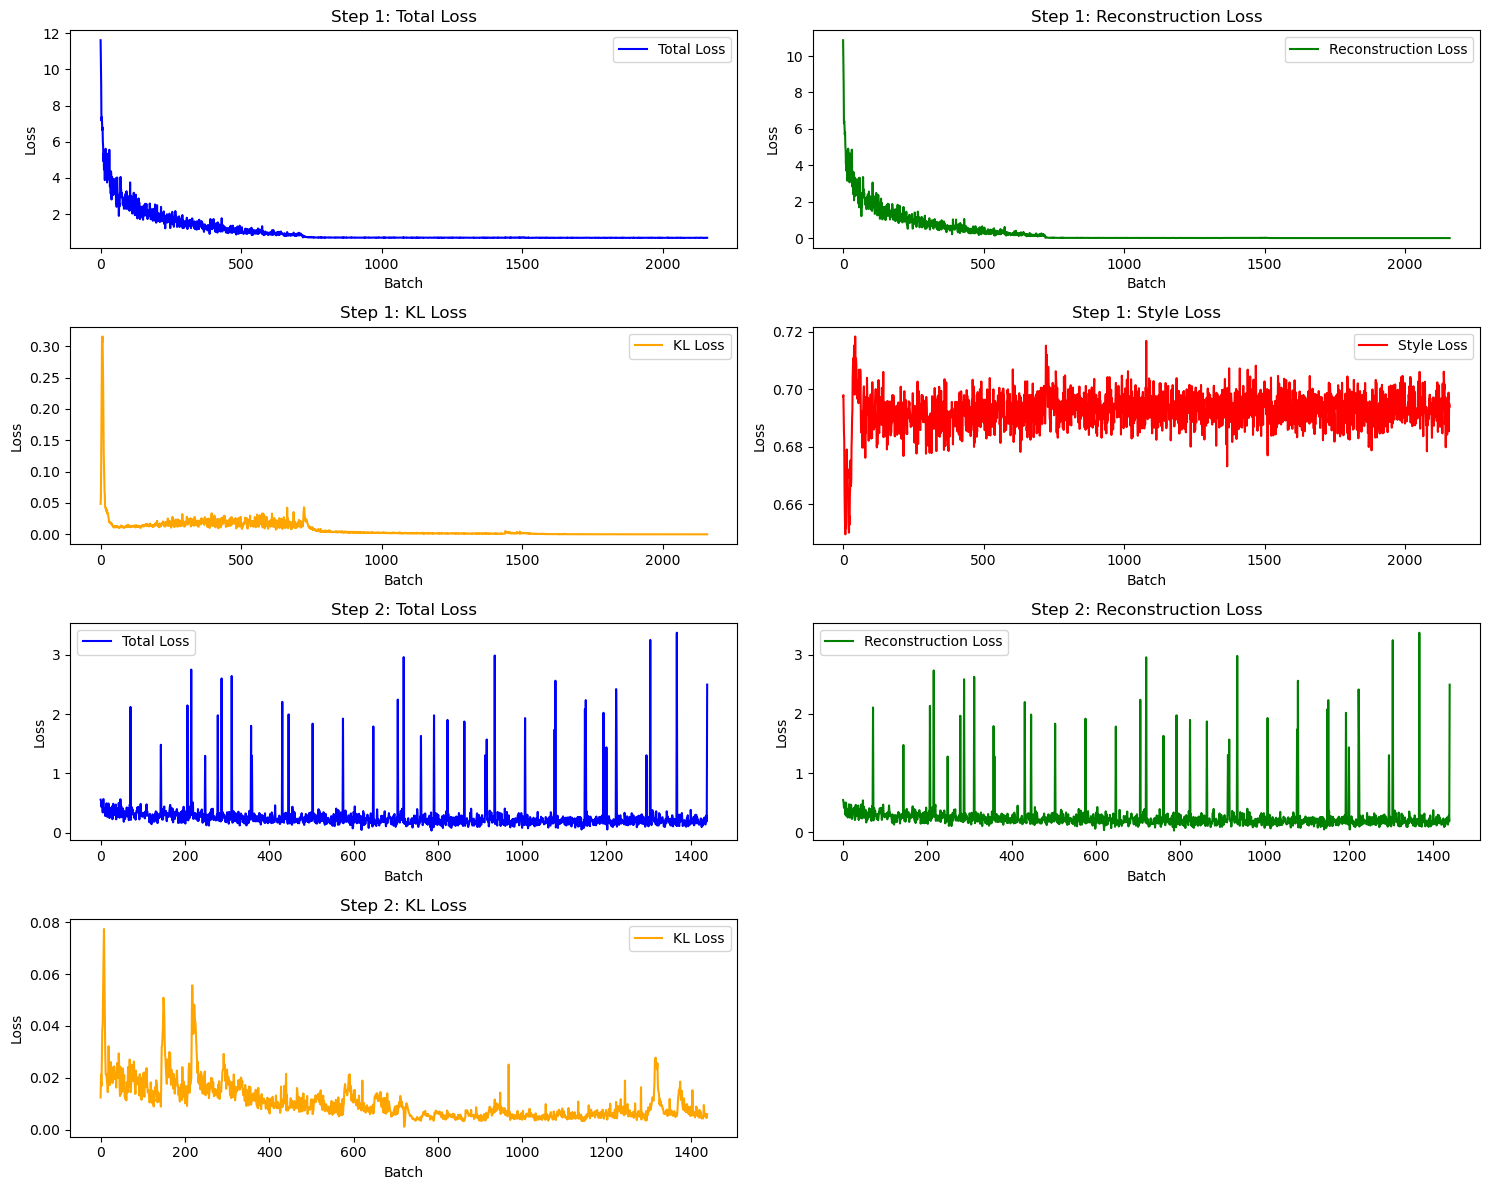

In [122]:
import matplotlib.pyplot as plt

def plot_losses(step1_losses, step2_losses):
    plt.figure(figsize=(15, 12))
    
    # Plot Step 1 Total Loss
    plt.subplot(4, 2, 1)
    plt.plot(step1_losses["total"], label="Total Loss", color="blue")
    plt.title("Step 1: Total Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot Step 1 Reconstruction Loss
    plt.subplot(4, 2, 2)
    plt.plot(step1_losses["recon"], label="Reconstruction Loss", color="green")
    plt.title("Step 1: Reconstruction Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Step 1 KL Loss
    plt.subplot(4, 2, 3)
    plt.plot(step1_losses["kl"], label="KL Loss", color="orange")
    plt.title("Step 1: KL Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot Step 1 Style Loss
    plt.subplot(4, 2, 4)
    plt.plot(step1_losses["style"], label="Style Loss", color="red")
    plt.title("Step 1: Style Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()

    # Plot Step 2 Total Loss
    plt.subplot(4, 2, 5)
    plt.plot(step2_losses["total"], label="Total Loss", color="blue")
    plt.title("Step 2: Total Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot Step 2 Reconstruction Loss
    plt.subplot(4, 2, 6)
    plt.plot(step2_losses["recon"], label="Reconstruction Loss", color="green")
    plt.title("Step 2: Reconstruction Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot Step 2 KL Loss
    plt.subplot(4, 2, 7)
    plt.plot(step2_losses["kl"], label="KL Loss", color="orange")
    plt.title("Step 2: KL Loss")
    plt.xlabel("Batch")
    plt.ylabel("Loss")
    plt.legend()
    
    plt.tight_layout()
    plt.show()


# Plot the losses
plot_losses(step1_losses, step2_losses)


Style Embedding Weights:
tensor([[ 1.0009,  0.2363, -0.7374,  ...,  0.4322,  0.8340, -0.0827],
        [-0.8074, -0.6795,  1.8619,  ..., -1.0150,  1.7407, -0.8035]],
       device='cuda:0')


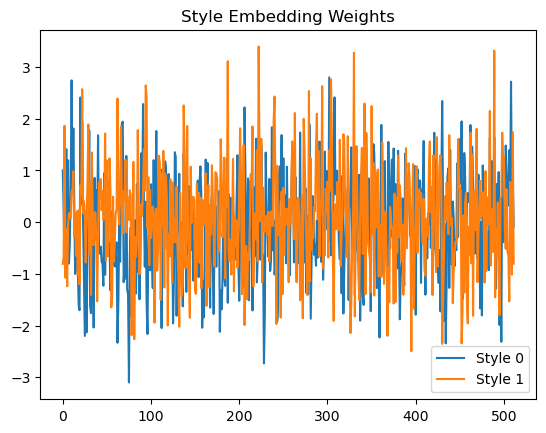

Cosine similarity between style embeddings: 0.0197


In [123]:
style_embedding_weights = model.style_emb.weight.data
print("Style Embedding Weights:")
print(style_embedding_weights)

# Convert weights to NumPy
style_weights_np = style_embedding_weights.cpu().numpy()

# Plot the weights (assuming 2 styles)
for i, emb in enumerate(style_weights_np):
    plt.plot(emb, label=f"Style {i}")
plt.legend()
plt.title("Style Embedding Weights")
plt.show()

cos_sim = torch.nn.functional.cosine_similarity(
    style_embedding_weights[0].unsqueeze(0), 
    style_embedding_weights[1].unsqueeze(0)
)
print(f"Cosine similarity between style embeddings: {cos_sim.item():.4f}")